In [1]:
# Import necessary packages
import pandas as pd
from matplotlib.pyplot import rcParams
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [2]:
# Load Data
data=pd.read_csv('AirPassengers.csv',index_col='Month')

In [3]:
# Check data type of index
data.index.dtype

dtype('O')

In [4]:
# Change data type of index to Date time
data.index=pd.to_datetime(data.index)

In [5]:
# Verify data type of index
data.index.dtype

dtype('<M8[ns]')

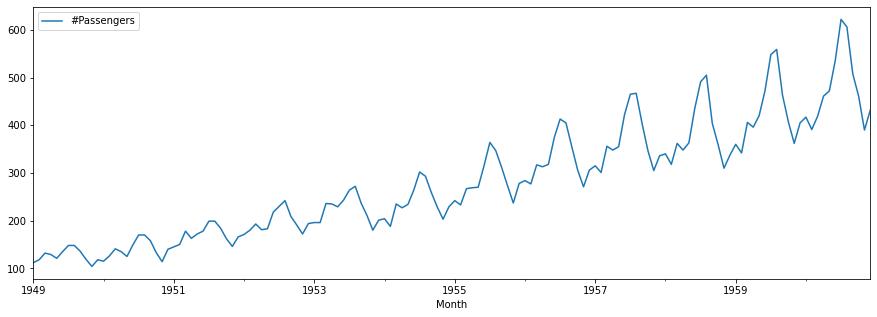

In [6]:
# Plot the Time Series Data
data.plot(figsize = (15,5))
plt.show()

In [7]:
# Check min & max dates
print(data.index.min())
print(data.index.max())

1949-01-01 00:00:00
1960-12-01 00:00:00


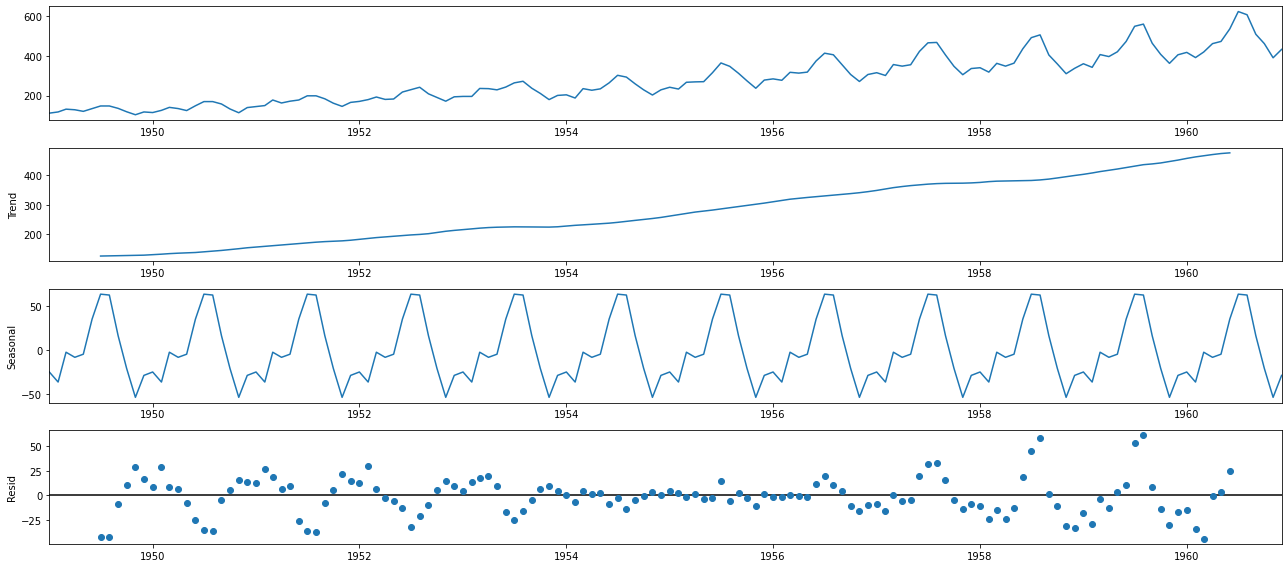

In [8]:
# Decompose into components
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(data, model = "additive")
fig = decomposition.plot()

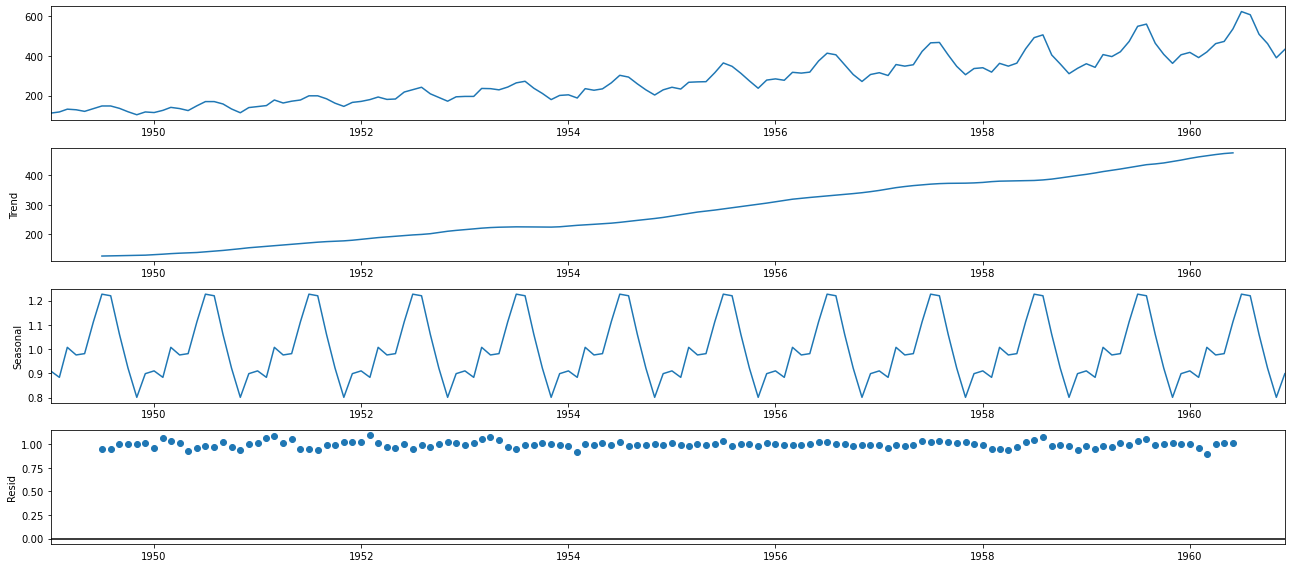

In [9]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(data, model = "multiplicative")
fig = decomposition.plot()

## Simple Moving Average Model

In [10]:
data.mean()

#Passengers    280.298611
dtype: float64

In [11]:
# Create a moving average model with 12 as the window. It will create mean of past 12 months
data_ma = data.copy()
data_ma['SMA_12'] = data_ma.rolling(window = 12).mean()
data_ma.head(20)

,#Passengers,SMA_12
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


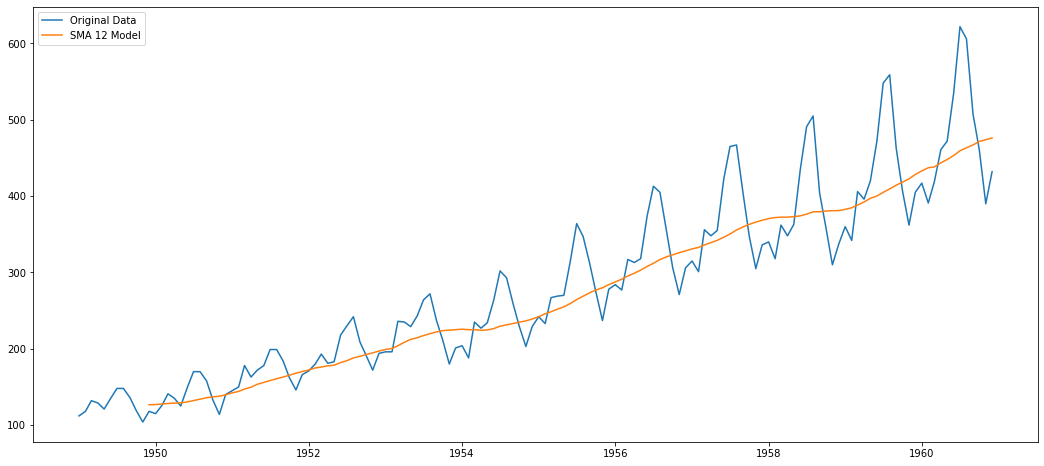

In [12]:
# Plot the Mean model & Original Model
plt.plot(data_ma['#Passengers'], label = 'Original Data')
plt.plot(data_ma['SMA_12'], label = "SMA 12 Model")
plt.legend()

In [13]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)) *100

In [14]:
# Compare Mean prediction & Original Value
mape(data_ma['#Passengers'], data_ma['SMA_12'])

10.778519137583197

## Stationarity Check using ADF TEST

In [15]:
# Check Stationarity of the Series
X = data['#Passengers']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


- NULL HYPOTHESIS - Time Series is not stationary
- Alternate Hypthesis  - Time Series is  stationary
- p value > 0.05 So we failed to reject null hypeothesis hence the Series is not Stationary

In [16]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [17]:
kpss_test(data['#Passengers'])

Results of KPSS Test:
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


- Null Hypothesis: The process is trend stationary.
- Alternate Hypothesis: The series has a unit root (series is not stationary).

In this case the NULL hypothesis is reverse, since p< .05, we reject NULL hypothesis, hence with this test also the series is non stationary.

- Case 1: Both tests conclude that the series is not stationary -> series is not stationary
- Case 2: Both tests conclude that the series is stationary -> series is stationary
- Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
- Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

# Making the Series Stationary

In [18]:
# 1 Differencing
data_1diff =     data.diff()
data_1diff.head()
# df  - df_1 by doing one order difference - in hope that this will make my TS stationary 

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


In [19]:
data_1diff.dropna(inplace=True)

In [20]:
import statsmodels.tsa.stattools as ts
adf_test = ts.adfuller(data_1diff)
print("p-value % 0.04f" % adf_test[1])

p-value  0.0542


p value > 0.05 So we failed to reject null hypeothesis hence the Series is not Stationary

<AxesSubplot:xlabel='Month'>

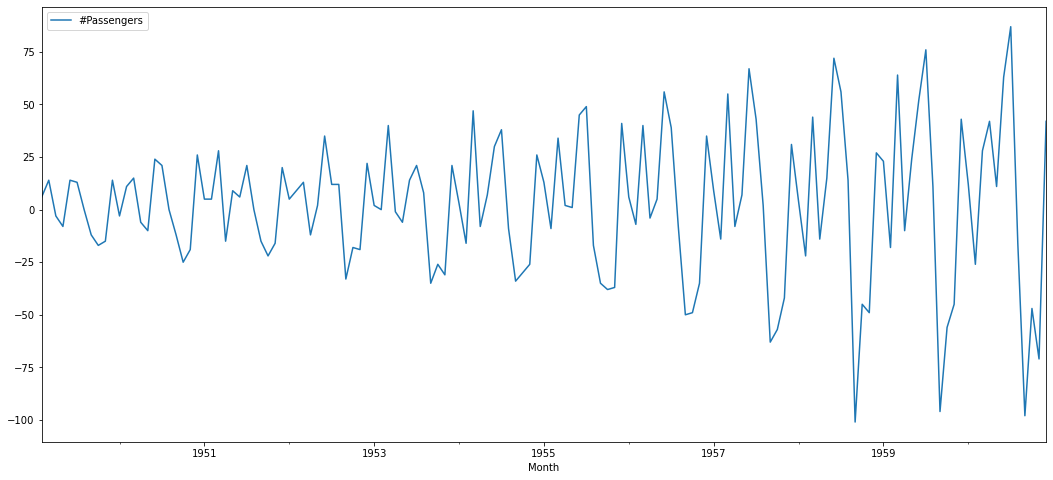

In [21]:
data_1diff.plot()

In [22]:
data_2diff =     data_1diff.diff()
data_2diff.head()

,#Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0


In [23]:
data_2diff.dropna(inplace=True)

<AxesSubplot:xlabel='Month'>

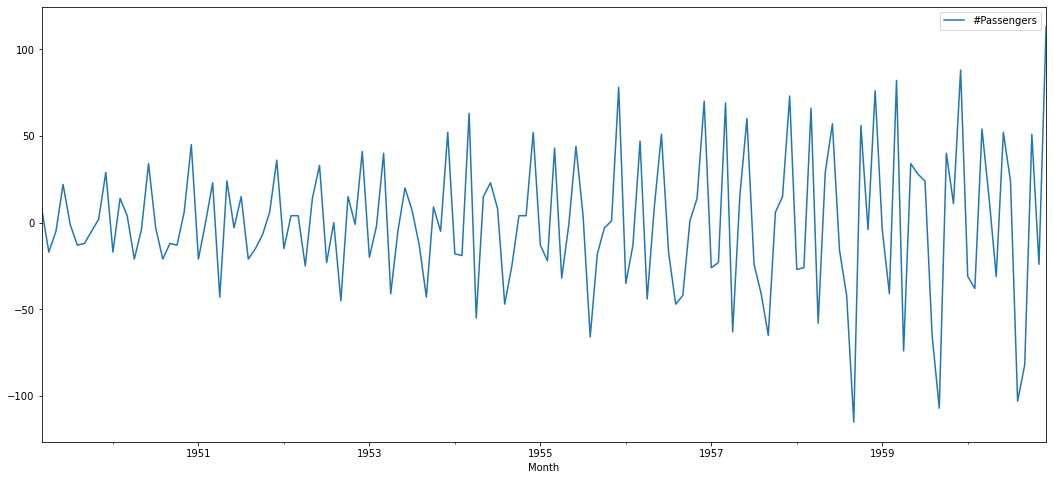

In [24]:
data_2diff.plot()

In [25]:
import statsmodels.tsa.stattools as ts
adf_test = ts.adfuller(data_2diff)
print("p-value % 0.04f" % adf_test[1])

p-value  0.0000


p value < 0.05 So , Series is no stationary

In [26]:
kpss_test(data_2diff['#Passengers'])

Results of KPSS Test:
Test Statistic            0.061088
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


p value > 0.05 So , Series is  stationary